# task 1.1


In [ ]:
import scipy.sparse
import string
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import CountVectorizer
import math
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh


In [ ]:
####IMPORT TRAINING DATA 
import pandas as pd
from collections import Counter
colname=["lable"]
st = load_svmlight_file("labeledBow.feat", dtype="uint8")
imdb = pd.DataFrame.sparse.from_spmatrix(st[0])
sentiment_train = pd.read_csv("labeledBow.feat",names=colname)
sentiment_train["score"] = sentiment_train["lable"].str.split(n=1).str[0]
# imdb.columns=wordcollumn
l=imdb.astype(bool).sum(axis=0)
imdb=imdb.append(l,ignore_index=True)
cols=[x for i,x in enumerate(imdb.columns) if imdb.iat[25000,i]>12500]
colls=[x for i,x in enumerate(imdb.columns) if imdb.iat[25000,i]<250]
imdb=imdb.drop(cols,axis=1)
imdb=imdb.drop(colls,axis=1)

print(imdb)

        21     23    27     30     31     32     33     34     35     36    \
0          0      0     1      0      0      1      0      0      0      0   
1          0      0     1      0      0      0      0      1      0      3   
2          0      0     1      0      0      0      0      1      0      0   
3          0      0     1      0      0      1      0      0      0      1   
4          0      0     0      1      1      2      0      1      0      1   
...      ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
24996      2      2     1      0      0      1      1      1      0      2   
24997      0      2     0      2      1      2      3      1      0      3   
24998      0      1     1      0      1      0      0      0      0      0   
24999      0      0     1      0      1      0      2      0      2      0   
25000  10308  10677  8595  11689  12203  11304  10370  11712  11564  11495   

       ...  1912  1924  1928  1929  1933  1935  1938  1958  196

# for test data set we rename the file to be "tlabeledBow.feat"

In [ ]:
##########import test data ALL TEST DATA VATIABES ARE "t"+name of training ones
import pandas as pd
from collections import Counter
colname=["lable"]
sd = load_svmlight_file("tlabeledBow.feat", dtype="uint8")
timdb = pd.DataFrame.sparse.from_spmatrix(sd[0])
sentiment_test = pd.read_csv("tlabeledBow.feat",names=colname)
sentiment_test["score"] = sentiment_test["lable"].str.split(n=1).str[0]
timdb=timdb.append(l,ignore_index=True)
cols=[x for i,x in enumerate(timdb.columns) if timdb.iat[25000,i]>12500]
colls=[x for i,x in enumerate(timdb.columns) if timdb.iat[25000,i]<250]
timdb=timdb.drop(cols,axis=1)
timdb=timdb.drop(colls,axis=1)
wholeset=imdb.drop([25000],axis=0)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
imdbb=imdb.drop([25000],axis=0)
timdbb=timdb.drop([25000],axis=0)
y=pd.DataFrame(sentiment_train["score"])
ty=pd.DataFrame(sentiment_test["score"])
for col in imdbb.columns:
  imdbb[col]=scale(imdbb[col])
for col in timdbb.columns:
  timdbb[col]=scale(timdbb[col])
sc_data = StandardScaler().fit(y).transform(y)
tsc_data =StandardScaler().fit(ty).transform(ty)
zscore=imdbb.apply(lambda row: np.dot(row/math.sqrt(25000),sc_data),axis=0)
z=zscore.T
z=z.sort_values(by=[0],ascending=True)
#select most pos and most neg
#sc_data is the standardized y; imdbb is the standardized x
negg=(z.head(10))
poss=(z.tail(10))

voc=pd.read_csv("imdb.vocab",names=colname)
# wordcollumn=np.array(voc)
# negg["word"] = [(wordcollumn[i]) for i in negg.index]
# negg
# poss["word"] = [(wordcollumn[i] )for i in poss.index]
# poss
# FRAMES=[poss,negg]
# final=pd.concat(FRAMES)
voc=pd.read_csv("imdb.vocab",names=colname)
voc=np.array(voc["lable"])
negg["word"] = [(voc[i]) for i in negg.index]
negg
poss["word"] = [(voc[i] )for i in poss.index]
poss
FRAMES=[poss,negg]
final=pd.concat(FRAMES)
print(final)








             0       word
297  18.346952  beautiful
493  19.201122   favorite
392  19.201256    perfect
437  19.217853      loved
459  19.993092    amazing
114  20.545087       love
115  24.739246       best
309  25.268965  excellent
369  25.661437  wonderful
83   32.062833      great
77  -42.995039        bad
240 -41.419351      worst
427 -33.466558      waste
368 -30.743631      awful
46  -27.427788          ?
373 -25.842413   terrible
422 -25.127076      worse
55  -24.636393         no
503 -23.872002   horrible
363 -23.818617     stupid


In [ ]:
# voc=pd.read_csv("imdb.vocab",names=colname)
# voc=np.array(voc["lable"])
# negg["word"] = [(voc[i]) for i in negg.index]
# negg
# poss["word"] = [(voc[i] )for i in poss.index]
# poss
# FRAMES=[poss,negg]
# final=pd.concat(FRAMES)
# print(final)





<BarContainer object of 20 artists>

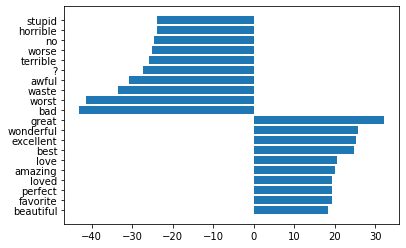

In [ ]:
final["z"]=final[0]
ynn=pd.to_numeric(final["z"])
pop=final["word"]
y_pos = np.arange(20)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(pop, ynn, align='center')


#task 2.1+3experiment



In [ ]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.01, epsilon=1e-4, max_iters=5000, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad
        
    def ce(self, x, y):
        return -np.sum(y * np.log(self.predict(x)))


    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

# LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function



fit log

In [ ]:
#binaray classify training data
y=y.astype(int)
y["bi"]= "0"
y["bi"][y["score"]>=7 ] = "1"
#binaray classify testing data
ty=ty.astype(int)
ty["bi"]= "0"
ty["bi"][ty["score"]>=7 ] = "1"

#top 10 most neg/most pos feature from linear regression
task3--1






In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

In [ ]:
#generate synthetic data amd form model

# X_train = StandardScaler().fit(imdbb).transform(imdbb)
zimdb= imdb.drop([25000],axis=0).append(zscore,ignore_index=True)
zcols=[x for i,x in enumerate(zimdb.columns) if abs(zimdb.iat[25000,i])<5]
zimdb=imdb.drop(zcols,axis=1).drop([25000],axis=0)
wholeset=imdb.drop(zcols,axis=1).drop([25000],axis=0)
ztimdb=timdb.drop([25000],axis=0).append(zscore,ignore_index=True)
ztimdb=timdb.drop(zcols,axis=1).drop([25000],axis=0)

for col in zimdb.columns:
  zimdb[col]=scale(zimdb[col])
for col in ztimdb.columns:
  ztimdb[col]=scale(ztimdb[col])
X_train =zimdb 
X_test = ztimdb
p=pd.DataFrame(y["bi"])
tp=pd.DataFrame(ty["bi"])
y_train=p.to_numpy().flatten().astype(int)
y_test=p.to_numpy().flatten().astype(int)
logitreg = LogisticRegression(max_iters=5000)
fit = logitreg.fit(X_train, y_train)
effect_size = pd.DataFrame(fit.w[:(len(fit.w)-1)]).transpose() # linear coefficents
print(effect_size.to_string(index=True))


        0         1         2         3         4        5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32       33        34        35        36        37        38        39       40        41        42        43        44        45        46        47     48        49        50        51        52        53        54        55        56        57        58        59        60       61        62        63        64        65        66        67        68        69        70       71        72        73        74        75        76        77        78        79       80        81        82       83        84        85        86        87        88        89        90        91       92        93        94        95        96        97        98        99        100

<Figure size 432x288 with 0 Axes>

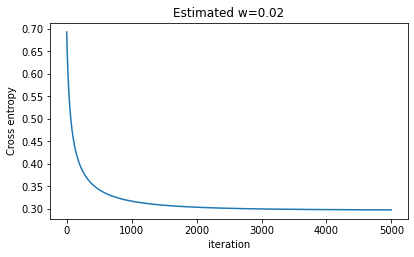

In [ ]:
yyy=p.to_numpy().flatten().astype(int)
X_train =zimdb 
lr = 0.01
niter = 5000
ce_all = np.zeros(niter)
N,D = X_train.shape
w = np.zeros(D)
w0 = w

for i in range(niter):
    N,D = X_train.shape
    ce_all[i] = cost_fn(X_train,yyy,w)    # cross-entropy
    yh = logistic(np.dot(X_train, w))
    dw = np.dot( X_train.T ,(yh - yyy))/N
    w = w - lr*dw

plt.clf()
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce_all)
plt.ylabel("Cross entropy")
plt.xlabel("iteration")
# plt.title(f"True w={w_true}; Estimated w={round(w.astype(float)[0],2)}")
plt.title(f"Estimated w={round(w.astype(float)[0],2)}")
# plt.show()
plt.savefig('ce_iteration.png', bbox_inches="tight", dpi=300)

In [ ]:
print("here we are using w(iteration =100)")
lr = 0.01
niter = 100
ce_all = np.zeros(niter)
N,D = X_train.shape
w = np.zeros(D)
w0 = w

for i in range(niter):
    N,D = X_train.shape
    ce_all[i] = cost_fn(X_train,yyy,w)    # cross-entropy
    yh = logistic(np.dot(X_train, w))
    dw = np.dot( X_train.T ,(yh - yyy))/N
    w = w - lr*dw

w0=w
epsilon = np.random.randn(1)[0] * 1e-5
w1 = w0 + epsilon
w2 = w0 - epsilon
ce1 = cost_fn(X_train,yyy,w1)
ce2 = cost_fn(X_train,yyy,w2)
dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient
print(dw_num)
dw_cal=np.sum(np.dot( X_train.T ,(yh - yyy))/N)#np.sum((yh - yyy) * X_train) # hand calculated gradient
print(dw_cal)
#print((dw_cal - dw_num).T*(dw_cal - dw_num))

#print(np.dot((dw_cal - dw_num).T,(dw_cal - dw_num))/np.dot((dw_cal + dw_num).T,(dw_cal + dw_num)))
print((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)


print("here we are using w(iteration =1000)")
lr = 0.01
niter = 1000
ce_all = np.zeros(niter)
N,D = X_train.shape
w = np.zeros(D)
w0 = w

for i in range(niter):
    N,D = X_train.shape
    ce_all[i] = cost_fn(X_train,yyy,w)    # cross-entropy
    yh = logistic(np.dot(X_train, w))
    dw = np.dot( X_train.T ,(yh - yyy))/N
    w = w - lr*dw

w0=w
epsilon = np.random.randn(1)[0] * 1e-5
w1 = w0 + epsilon
w2 = w0 - epsilon
ce1 = cost_fn(X_train,yyy,w1)
ce2 = cost_fn(X_train,yyy,w2)
dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient
print(dw_num)
dw_cal=np.sum(np.dot( X_train.T ,(yh - yyy))/N)#np.sum((yh - yyy) * X_train) # hand calculated gradient
print(dw_cal)
#print((dw_cal - dw_num).T*(dw_cal - dw_num))

#print(np.dot((dw_cal - dw_num).T,(dw_cal - dw_num))/np.dot((dw_cal + dw_num).T,(dw_cal + dw_num)))
print((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)







print("here we are using w(iteration =5000)")
lr = 0.01
niter = 5000
ce_all = np.zeros(niter)
N,D = X_train.shape
w = np.zeros(D)
w0 = w

for i in range(niter):
    N,D = X_train.shape
    ce_all[i] = cost_fn(X_train,yyy,w)    # cross-entropy
    yh = logistic(np.dot(X_train, w))
    dw = np.dot( X_train.T ,(yh - yyy))/N
    w = w - lr*dw

w0=w
epsilon = np.random.randn(1)[0] * 1e-5
w1 = w0 + epsilon
w2 = w0 - epsilon
ce1 = cost_fn(X_train,yyy,w1)
ce2 = cost_fn(X_train,yyy,w2)
dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient
print(dw_num)
dw_cal=np.sum(np.dot( X_train.T ,(yh - yyy))/N)#np.sum((yh - yyy) * X_train) # hand calculated gradient
print(dw_cal)
#print((dw_cal - dw_num).T*(dw_cal - dw_num))

#print(np.dot((dw_cal - dw_num).T,(dw_cal - dw_num))/np.dot((dw_cal + dw_num).T,(dw_cal + dw_num)))
print((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)


here we are using w(iteration =100)
0.0921651230312386
0.09317204826453966
2.951680784009062e-05
here we are using w(iteration =1000)
0.00866192318362403
0.008674406975278234
5.185357281086124e-07
here we are using w(iteration =5000)
-0.0013549796701937547
-0.0013550167954404285
1.876727625840029e-10


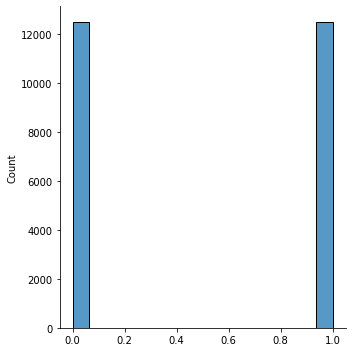

In [ ]:
import seaborn as sns
sns.displot(yyy)


In [ ]:
column_headers = zimdb.columns.values.tolist()
indexx=pd.DataFrame( column_headers )
indexx=(indexx.T).astype(int).squeeze()
effect_size=effect_size.set_axis(indexx, axis=1)
effect_size=effect_size.set_axis([1], axis=0)
# voc=pd.read_csv("imdb.vocab",names=colname)
# voc=np.array(voc["lable"])
logifeature=effect_size.sort_values(by=[1],ascending=True, axis=1)
mostneg=logifeature.iloc[: , :10]
logifeature=effect_size.sort_values(by=[1],ascending=False, axis=1)
mostpos=logifeature.iloc[: , :10]
lognegg=mostneg.T
lognegg["word"] = [(voc[i]) for i in lognegg.index]
logposs=mostpos.T
logposs["word"] = [(voc[i] )for i in logposs.index]
logFRAMES=[logposs,lognegg]
logfinal=pd.concat(logFRAMES)
print(logfinal)


            1       word
0                       
83   0.386176      great
309  0.310000  excellent
115  0.262614       best
392  0.235803    perfect
493  0.209187   favorite
459  0.203705    amazing
242  0.198193        fun
369  0.197815  wonderful
71   0.182573       well
437  0.180946      loved
240 -0.456123      worst
427 -0.369801      waste
368 -0.334447      awful
77  -0.326286        bad
344 -0.263857     boring
856 -0.249981     poorly
46  -0.245496          ?
734 -0.228800       dull
503 -0.220109   horrible
328 -0.219440       poor


<BarContainer object of 20 artists>

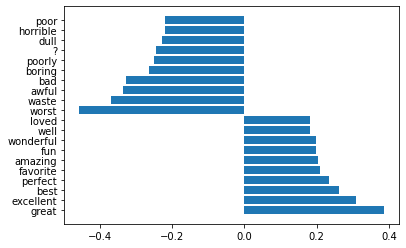

In [ ]:
#logfinal["z"]=logfinal[0]
logynn=pd.to_numeric(logfinal[1])
logpop=logfinal["word"]
y_pos = np.arange(20)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(logpop, logynn, align='center')

EXTRA EXPERIMENT: Ridge Model

In [ ]:
#extra experiment ridge model
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
fitr_1=Ridge(0.1).fit(X_train,y_train)
fitr_2=Ridge(0.3).fit(X_train,y_train)
fitr_3=Ridge(0.5).fit(X_train,y_train)
fitr_4=Ridge(0.7).fit(X_train,y_train)
fitr_5= RidgeClassifier().fit(X_train,y_train)
ridscore=[0]*5
ridscore[0]=fitr_1.score(X_train,y_train)
ridscore[1]=fitr_2.score(X_train,y_train)
ridscore[2]=fitr_3.score(X_train,y_train)
ridscore[3]=fitr_4.score(X_train,y_train)
ridscore[4]=fitr_5.score(X_train,y_train)
print(ridscore)


[0.48780063041919164, 0.48780063040848143, 0.48780063038706134, 0.48780063035493204, 0.87164]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
fit = logitreg.fit(X_train, y_train)


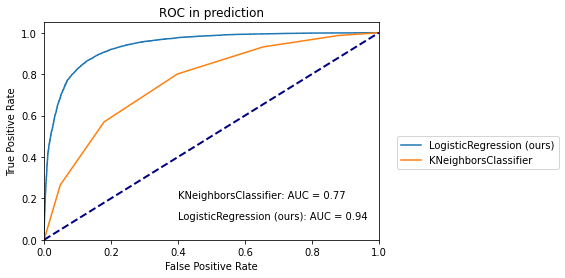

In [ ]:

perf = {}
y_test_prob=fit.predict( X_test )
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
auroc = roc_auc_score(y_test, y_test_prob)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}
models = [KNeighborsClassifier()]

for model in models:
    fit = model.fit(X_train, y_train)
    y_test_prob = fit.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auroc = roc_auc_score(y_test, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}

plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in prediction')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
# plt.show()
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
# plt.close()



In [ ]:
from re import A
def difsizetrain(n):
  #n is percentage of taining set
  wholeset["score"]=pd.DataFrame(y["bi"])
  lok=pd.DataFrame(wholeset.sample(int(25000*n)))
  q=pd.DataFrame(lok["score"])
  pre_train=lok.drop(columns=["score"])
  for col in pre_train.columns:
    pre_train[col]=scale(pre_train[col])
  x_train = pre_train
  y_train=q.to_numpy().flatten().astype(int)
  fit = logitreg.fit(x_train,y_train)
  y_test_prob = fit.predict(X_test)
  y_test_pred = (y_test_prob > 0.5).astype(int)
  auroc = roc_auc_score(y_test, y_test_prob) 
  
  return auroc 


In [ ]:
def knntrain(n):
  wholeset["score"]=pd.DataFrame(y["bi"])
  klok=pd.DataFrame(wholeset.sample(int(25000*n)))
  kq=pd.DataFrame(klok["score"])
  kpre_train=klok.drop(columns=["score"])
  for col in kpre_train.columns:
    kpre_train[col]=scale(kpre_train[col])
  kx_train = kpre_train
  ky_train= kq.to_numpy().flatten().astype(int)
  fit = KNeighborsClassifier().fit(kx_train, ky_train.astype(int))
  ky_test_prob = fit.predict_proba(X_test)[:,1]
  #ky_test_pred = (ky_test_prob > 0.5).astype(int)
  auroc = roc_auc_score(y_test, ky_test_prob)
  return auroc
dd= {'20%': [knntrain(0.2)], '40%': [ knntrain(0.4) ] ,'60%':  [ knntrain(0.6) ], '80%':  [ knntrain(0.8) ], '100%':  [ knntrain(1) ]}
#kdd=pd.DataFrame(data=dd, index=["accuracy"])
d = {'20%': [difsizetrain(0.2)], '40%': [ difsizetrain(0.4) ] ,'60%':  [ difsizetrain(0.6) ], '80%':  [ difsizetrain(0.8) ], '100%':  [ difsizetrain(1) ]}


# kfit = KNeighborsClassifier().fit(x_train,y_train)
#   ky_test_prob = kfit.predict_proba(X_test)
#   ky_test_pred = (ky_test_prob > 0.5).astype(int)
#   kauroc = roc_auc_score(y_test, ky_test_prob)

In [ ]:
#d = {'20%': [difsizetrain(0.2)], '40%': [ difsizetrain(0.4) ] ,'60%':  [ difsizetrain(0.6) ], '80%':  [ difsizetrain(0.8) ], '100%':  [ difsizetrain(1) ]}
#dd= {'20%': [knntrain(0.2)], '40%': [ knntrain(0.4) ] ,'60%':  [ knntrain(0.6) ], '80%':  [ knntrain(0.8) ], '100%':  [ knntrain(1) ]}
kdd=pd.DataFrame(data=dd, index=["knn"])
ldd=pd.DataFrame(data=d, index=["logistic"])
#pd.DataFrame(data=dd, index=["accuracy"])
FRAMES=[ldd,kdd]
finalroc=pd.concat(FRAMES)
print(finalroc)

               20%       40%       60%       80%      100%
logistic  0.924092  0.933769  0.935803  0.937819  0.938667
knn       0.700739  0.729569  0.749135  0.755460  0.768426


20%     0.700739
40%     0.729569
60%     0.749135
80%     0.755460
100%    0.768426
Name: knn, dtype: float64


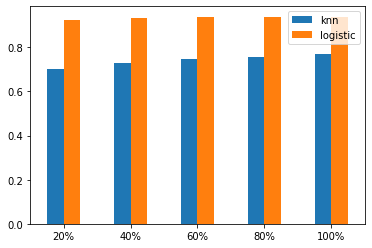

In [ ]:
hhh=finalroc.loc["logistic"]
hh=finalroc.loc["knn"]
print((hh))
index = ['20%', '40%', '60%',
         '80%', '100%']
df = pd.DataFrame({'knn': hh ,'logistic': hhh}, index=index)
ax = df.plot.bar(rot=0)

loossss


In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

# Part 2: 20 News Datasets Begins Here

In [ ]:
import scipy.sparse
import string
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn import model_selection
import math
import random

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Clean Data, Select Features

In [ ]:
def clean_text(text):
    # Remove special characters
    alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
    text = list(map(alphanumeric, text))
    # Remove punctuations
    punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x.lower())
    text = list(map(punc_lower, text))
    # Remove white spaces
    strip = lambda x: str.rsplit(x)
    text = list(map(strip, text))
    # Remove stopwords
    stop = list(stopwords.words('english'))
    remove_stopwords = lambda x: " ".join([w for w in x if w not in stopwords.words('english')])
    text = list(map(remove_stopwords, text))
    return text

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# Retrieve training and testing data
categories = ["rec.sport.baseball", "comp.graphics", "soc.religion.christian", "sci.med"]
news_train  = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']), categories=categories, shuffle=False)
news_test  = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']), categories=categories, shuffle=False)
print(news_train)
# Clean data
news_train_data = clean_text(news_train.data)
news_test_data = clean_text(news_test.data)

{'data': ["\nmorgan and guzman will have era's 1 run higher than last year, and\n the cubs will be idiots and not pitch harkey as much as hibbard.\n castillo won't be good (i think he's a stud pitcher)", 'Does anyone on this newsgroup happen to know WHY morphine was\nfirst isolated from opium?  If you know why, or have an idea for where I\ncould look to find this info, please mail me.\n\tCSH\nany suggestionas would be greatly appreciated\n\n--\n "Kilimanjaro is a pretty tricky climb. Most of it\'s up, until you reach\nthe very, very top, and then it tends to slope away rather sharply."\n\t\t\t\t\tSir George Head, OBE (JC)', '\n\n\n\n\nUm, the header said *career.*  Hodapp managed about 3000 PA in his\nnine years in the majors.\n\nAs for his "consistently over .300," make that "three years in a row, \npreceded by a part-time year, plus his last year, with Boston."  Hodapp\nonly qualified for the batting title five times.  \n\nWas he injured?  He retired right around his 28th birthday.\n

In [147]:
# Load data into vectorized forms
vectorize_X_dummy = CountVectorizer(min_df=0.01) # excludes words appearing in less than 1% of documents
X_dummy = vectorize_X_dummy.fit_transform(news_train_data).toarray()

X_dummy.shape

(2374, 1264)

**Formula for PMI:**

*log_2 ( p(word | class) / p(word) )*


where:

 *p(word | class)* = # times w occurred in class c / # documents in class c

 *p(word)* = # times w occurred across all classes / # documents 

In [148]:
# Class subsets of dummy data
X_dummy0 = np.take(X_dummy, np.where(news_train.target == 0)[0], axis=0)
X_dummy1 = np.take(X_dummy, np.where(news_train.target == 1)[0], axis=0)
X_dummy2 = np.take(X_dummy, np.where(news_train.target == 2)[0], axis=0)
X_dummy3 = np.take(X_dummy, np.where(news_train.target == 3)[0], axis=0)

# Reduce each document to binary indicator of whether a word occurred
X_dummy0_bin = (X_dummy0 > 0).astype(int)
X_dummy1_bin = (X_dummy1 > 0).astype(int)
X_dummy2_bin = (X_dummy2 > 0).astype(int)
X_dummy3_bin = (X_dummy3 > 0).astype(int)

# Get counts for the number of times each word occurred accross the documents of each class
# --> counts[0][5] = num times word 5 appeared in class 0

vocabulary_size = int(X_dummy.shape[1])
counts = np.zeros((4, vocabulary_size))

counts[0] = np.sum(X_dummy0_bin, axis=0)
counts[1] = np.sum(X_dummy1_bin, axis=0)
counts[2] = np.sum(X_dummy2_bin, axis=0)
counts[3] = np.sum(X_dummy3_bin, axis=0)


# Find PMI for each word in each class

pmi = np.zeros((4, vocabulary_size))
# Note: X_dummy0.shape[0] = the number of documents in class 0, X_dummy.shape[0] = # of documents 
pmi[0] = np.log2((counts[0]/X_dummy0.shape[0]) / ((counts[0] + counts[1] + counts[2] + counts[3])/X_dummy.shape[0]))
pmi[1] = np.log2((counts[1]/X_dummy1.shape[0]) / ((counts[0] + counts[1] + counts[2] + counts[3])/X_dummy.shape[0]))
pmi[2] = np.log2((counts[2]/X_dummy2.shape[0]) / ((counts[0] + counts[1] + counts[2] + counts[3])/X_dummy.shape[0]))
pmi[3] = np.log2((counts[3]/X_dummy3.shape[0]) / ((counts[0] + counts[1] + counts[2] + counts[3])/X_dummy.shape[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log2


In [149]:
# Get top words for each class

num_words = 5
for i in range(4):
    print()
    top_words = list(np.argpartition(pmi[i], len(pmi[i]) - num_words)[-num_words:])
    print(f"top {num_words} words for {news_train.target_names[i]}\n")
    for t in top_words:
        print(vectorize_X_dummy.get_feature_names_out()[t])


top 5 words for comp.graphics

algorithm
graphics
animation
video
vga

top 5 words for rec.sport.baseball

cubs
defensive
sox
dodgers
braves

top 5 words for sci.med

patients
syndrome
diet
shameful
gebcadredslpittedu

top 5 words for soc.religion.christian

religions
salvation
christ
biblical
holy


In [150]:
# Justification for using 100 words in each class

vocab_size = list()
usable_data = list()

for num_words in range(10,105, 5):
    vocab = set()
    for j in range(4):
        top_words = list(np.argpartition(pmi[j], len(pmi[j]) - num_words)[-num_words:])
        for t in top_words:
            vocab.add(vectorize_X_dummy.get_feature_names_out()[t])
    vectorize_X_train = CountVectorizer(vocabulary = vocab)
    X_train = vectorize_X_train.fit_transform(news_train_data).toarray()
    percentage_zero = (X_train.sum(axis=1) == 0).sum() / X_train.shape[0]
    vocab_size.append(len(vocab))
    usable_data.append(100 - percentage_zero*100)
    print(f"Vocabulary size of {len(vocab)} yields {100 - percentage_zero*100}% of training data usable")


Vocabulary size of 40 yields 43.97641112047178% of training data usable
Vocabulary size of 60 yields 51.09519797809604% of training data usable
Vocabulary size of 80 yields 61.96293176074136% of training data usable
Vocabulary size of 100 yields 68.78685762426285% of training data usable
Vocabulary size of 120 yields 72.7464195450716% of training data usable
Vocabulary size of 140 yields 76.4111204717776% of training data usable
Vocabulary size of 160 yields 79.06486941870261% of training data usable
Vocabulary size of 180 yields 81.29738837405223% of training data usable
Vocabulary size of 200 yields 82.9401853411963% of training data usable
Vocabulary size of 220 yields 83.7826453243471% of training data usable
Vocabulary size of 240 yields 84.54085930918282% of training data usable
Vocabulary size of 260 yields 85.256950294861% of training data usable
Vocabulary size of 280 yields 85.8887952822241% of training data usable
Vocabulary size of 300 yields 87.95282224094356% of training 

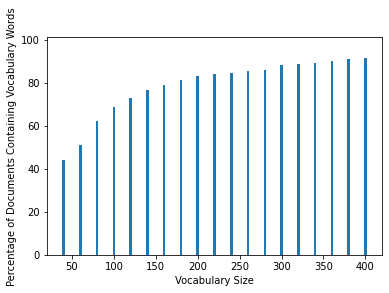

In [151]:
plt.bar(vocab_size, usable_data, width=3)
ax = plt.gca()
ax.set_ylim([0, 101])
plt.ylabel('Percentage of Documents Containing Vocabulary Words')
plt.xlabel('Vocabulary Size')
plt.savefig("usabledocuments.png")

# Define function to create datasets (Regression & KNN)

In [ ]:
# One hot encode features

def one_hot_encode(y):
    """
    input: a Nx1 array with C values ranging from 0-C 
    output: an NxC array with 0's or 1 representing presence of a class
    """
    N = y.shape[0]
    C = np.unique(y).shape[0]
    new_y = np.zeros((N, C))
    for i in range(N):
        new_y[i][y[i]] = 1
    return new_y.astype(int)



    # np.apply_along_axis(lambda x: )

In [136]:
def create_data_set(vocab_size=400, training_size=1, KNN=False):
    num_words = int(vocab_size/4)
    vocab = set()
    for i in range(4):
        top_words = list(np.argpartition(pmi[i], len(pmi[i]) - num_words)[-num_words:])
        for t in top_words:
            vocab.add(vectorize_X_dummy.get_feature_names_out()[t])
    print(f"Vocabulary has size {len(vocab)}\n")

    vectorize_X_train = CountVectorizer(vocabulary = vocab)
    X_train = vectorize_X_train.fit_transform(news_train_data).toarray()
    if KNN:
        Y_train = news_train.target
    else:
        Y_train = one_hot_encode(news_train.target)
    zero_indices = np.argwhere(np.sum(X_train, axis=1) == 0).flatten()
    X_train = np.delete(X_train, zero_indices, axis=0)
    Y_train = np.delete(Y_train, zero_indices, axis=0)

    if not training_size == 1:
        
        N = X_train.shape[0]
        newN = int(N*training_size)
        indices = random.sample(range(N), newN)
        X_train = np.take(X_train, indices, axis=0)
        Y_train = np.take(Y_train, indices, axis=0)


    vectorize_X_test = CountVectorizer(vocabulary=vectorize_X_train.vocabulary_)
    X_test = vectorize_X_test.fit_transform(news_test_data).toarray() # constututes 40% of data
    Y_test = news_test.target
    X_test, X_val, Y_test, Y_val = model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state=3, shuffle=True)
    if not KNN:
        Y_test = one_hot_encode(Y_test)
        Y_val = one_hot_encode(Y_val)

    print(f"X_train: {X_train.shape}\nY_train: {Y_train.shape}\n")
    print(f"X_validation: {X_val.shape}\nY_validation: {Y_val.shape}\n")
    print(f"X_test: {X_test.shape}\nY_test: {Y_test.shape}\n")

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set(vocab_size=400, training_size=1, KNN=False)

percentage_zero = (X_test.sum(axis=1) == 0).sum() / X_test.shape[0]
print(f"Vocabulary size of {len(vocab)} yields {percentage_zero*100}% of testing data unusable")
percentage_zero = (X_val.sum(axis=1) == 0).sum() / X_val.shape[0]
print(f"Vocabulary size of {len(vocab)} yields {percentage_zero*100}% of validation data unusable")

Vocabulary has size 400

X_train: (2172, 400)
Y_train: (2172, 4)

X_validation: (790, 400)
Y_validation: (790, 4)

X_test: (790, 400)
Y_test: (790, 4)

Vocabulary size of 400 yields 9.873417721518987% of testing data unusable
Vocabulary size of 400 yields 9.367088607594937% of validation data unusable


In [145]:
c1 = len(np.where(news_train.target == 0)[0])
c2 = len(np.where(news_train.target == 1)[0])
c3 = len(np.where(news_train.target == 2)[0])
c4 = len(np.where(news_train.target == 3)[0])
total = c1 + c2 + c3 + c4
print("Class distribution:")
print(f"{(c1/total)*100:.2f}%, {(c2/total)*100:.2f}%, {(c3/total)*100:.2f}%, {(c4/total)*100:.2f}%")

Class distribution:
24.60%, 25.15%, 25.02%, 25.23%


# Define Regression Model

In [ ]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

In [ ]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):

        a = np.matmul(X, self.W)
        a = np.apply_along_axis((lambda row: row - np.max(row)), 1, a) # subtract max to avoid overflow 
        y_pred = np.exp(a) 
        z =  y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

        # print(f"unexponentiated: {np.matmul(X, self.W).shape}")
        # print(f"exponentiated: {y_pred.shape}")
        # print(f"z: {z.shape}")
        return z

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
        log_y_pred = np.log(self.predict(X))
        log_y_pred[log_y_pred==-np.inf]=-10000 # replace -inf with large negative number to allow computation.
        return -np.sum(y * log_y_pred)

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100, early_stopping=False, look_back=1):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)

        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                print(f"iter {i}: {loss_train:.3f}")
            # implements early stopping
            if early_stopping and i >= look_back:
                if np.mean(losses_valid[i-look_back:i]) < loss_valid:
                    losses_train = losses_train[:i]
                    losses_valid = losses_valid[:i]
                    print("Fitting stopped due to validation error increase")
                    break
        return losses_train, losses_valid

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff.sum()


# Run Regression Model

In [ ]:
# IDEA: find misclassification error as a function of vocabulary size
X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set()
D = X_train.shape[1]
C = Y_train.shape[1]

mlr = Multinomial_logistic(D, C)

Vocabulary has size 400

X_train: (2172, 400)
Y_train: (2172, 4)

X_validation: (790, 400)
Y_validation: (790, 4)

X_test: (790, 400)
Y_test: (790, 4)



In [ ]:
ce_train, ce_val = mlr.fit(X_train, Y_train, X_val, Y_val, lr=0.003, niter=300, early_stopping=True, look_back=3)

iter 0: 1605.833; 603.617
iter 1: 1368.039; 560.202
iter 2: 1239.833; 539.294
iter 3: 1157.226; 525.306
iter 4: 1097.835; 510.055
iter 5: 1049.600; 497.478
iter 6: 1009.622; 488.148
iter 7: 976.049; 479.163
iter 8: 947.984; 474.201
iter 9: 919.253; 466.559
iter 10: 895.746; 460.648
iter 11: 874.974; 456.773
iter 12: 854.575; 451.395
iter 13: 836.997; 448.154
iter 14: 819.983; 443.740
iter 15: 805.122; 441.295
iter 16: 790.023; 437.491
iter 17: 776.764; 435.026
iter 18: 764.270; 431.982
iter 19: 752.992; 430.319
iter 20: 741.227; 427.482


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 21: 730.822; 425.529
iter 22: 721.000; 423.379
iter 23: 711.816; 421.879
iter 24: 702.830; 419.827
iter 25: 694.596; 418.574
iter 26: 686.327; 416.733
iter 27: 678.768; 415.532
iter 28: 671.370; 413.955
iter 29: 664.485; 412.911
iter 30: 657.645; 411.491
iter 31: 651.289; 410.521
iter 32: 645.033; 409.272
iter 33: 639.160; 408.392
iter 34: 633.366; 407.273
iter 35: 627.905; 406.466
iter 36: 622.529; 405.464
iter 37: 617.432; 404.722
iter 38: 612.419; 403.822
iter 39: 607.643; 403.138
iter 40: 602.951; 402.325
iter 41: 598.460; 401.694
iter 42: 594.052; 400.958
iter 43: 589.816; 400.374
iter 44: 585.662; 399.706
iter 45: 581.655; 399.165
iter 46: 577.728; 398.557
iter 47: 573.928; 398.056
iter 48: 570.207; 397.501
iter 49: 566.595; 397.035
iter 50: 563.060; 396.529
iter 51: 559.620; 396.096
iter 52: 556.254; 395.632
iter 53: 552.973; 395.230
iter 54: 549.761; 394.805
iter 55: 546.625; 394.430
iter 56: 543.556; 394.042
iter 57: 540.554; 393.693
iter 58: 537.615; 393.336
iter 59: 534

In [ ]:
diff = mlr.check_grad(X_train, Y_train)
print(f"Gradient calculation showed difference of {diff}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Gradient calculation showed difference of 3.141838286511727e-08


In [ ]:
train_accuracy = evaluate(mlr.predict(X_train), Y_train)
valid_accuracy = evaluate(mlr.predict(X_val), Y_val)
test_accuracy = evaluate(mlr.predict(X_test), Y_test)

print(train_accuracy)
print(valid_accuracy)
print(test_accuracy)

0.9507366482504604
0.810126582278481
0.7987341772151899


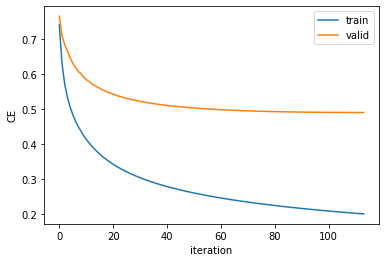

In [ ]:
plt.clf()
plt.plot(ce_train/X_train.shape[0], label='train')
plt.plot(ce_val/X_val.shape[0], label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.legend()
# plt.show()

#KNN

In [ ]:
# Define misclassification accuracy for knn

def evaluate_knn(y_pred, y_actual):
    return np.sum(y_pred == y_actual)/y_pred.shape[0]

Vocabulary has size 400

X_train: (2172, 400)
Y_train: (2172,)

X_validation: (790, 400)
Y_validation: (790,)

X_test: (790, 400)
Y_test: (790,)



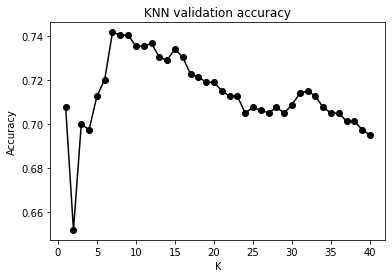


Best valid K: 7
KNN=7 test accuracy: 73.7% for full dataset


In [ ]:
# Select hyperparameter K for 100% of training data

val_accuracies = list()
maxK = 40
X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set(KNN=True)

# Evaluate model on validation data for different values of K
for k in range(1, maxK+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_val)
    val_accuracies.append(evaluate_knn(y_pred, Y_val))
best_valid_k = range(1,maxK+1)[val_accuracies.index(max(val_accuracies))]

# Plot validation accuracy as a function of K
plt.plot(range(1,41), val_accuracies, marker='o', color='black', label='validation accuracy')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN validation accuracy")
plt.show()

print(f"\nBest valid K: {best_valid_k}")

# Evaluate model on testing data

knn = KNeighborsClassifier(n_neighbors=best_valid_k)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy = evaluate_knn(y_pred, Y_test)
print(f"KNN={best_valid_k} test accuracy: {accuracy*100:.1f}% for full dataset")

In [ ]:
def run_KNN(training_size):
    """
    Selects optimal hyperparameter from validation data and uses it to evaluate test accuracy
    """

    X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set(training_size=training_size, KNN=True)

    val_accuracies = list()
    maxK = 40

    # Evaluate model on validation data for different values of K
    for k in range(1, maxK+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        y_pred = knn.predict(X_val)
        val_accuracies.append(evaluate_knn(y_pred, Y_val))
    best_valid_k = range(1,maxK+1)[val_accuracies.index(max(val_accuracies))]

    knn = KNeighborsClassifier(n_neighbors=best_valid_k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = evaluate_knn(y_pred, Y_test)
    return accuracy

# Splitting Training Data: 20, 40, 60, 80, 100

In [ ]:
regression_accuracy = list()
KNN_accuracy = list()

for size in [.2, .4, .6, .8, 1]:
    
    # Create dataset for Regression Model
    X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set(training_size=size)

    # Train Regression Model
    D = X_train.shape[1]
    C = Y_train.shape[1]
    mlr = Multinomial_logistic(D, C)
    mlr.fit(X_train, Y_train, X_val, Y_val, lr=0.003, niter=300, early_stopping=True, look_back=3)

    #Evaluate Regression Model
    regression_accuracy.append(evaluate(mlr.predict(X_test), Y_test))

    # Get Data, Train, and Evaluate KNN model
    KNN_accuracy.append(run_KNN(size))


Vocabulary has size 400

X_train: (434, 400)
Y_train: (434, 4)

X_validation: (790, 400)
Y_validation: (790, 4)

X_test: (790, 400)
Y_test: (790, 4)

iter 0: 563.685; 1052.792
iter 1: 459.957; 914.502
iter 2: 409.028; 845.040
iter 3: 375.316; 798.927
iter 4: 350.940; 765.598
iter 5: 331.850; 739.681
iter 6: 316.222; 718.629
iter 7: 303.045; 700.973
iter 8: 291.692; 685.813
iter 9: 281.746; 672.567
iter 10: 272.913; 660.837
iter 11: 264.984; 650.341
iter 12: 257.801; 640.864
iter 13: 251.244; 632.247
iter 14: 245.220; 624.362
iter 15: 239.653; 617.109
iter 16: 234.486; 610.406
iter 17: 229.668; 604.187
iter 18: 225.161; 598.396
iter 19: 220.931; 592.987
iter 20: 216.949; 587.922
iter 21: 213.190; 583.165
iter 22: 209.635; 578.688
iter 23: 206.264; 574.465
iter 24: 203.061; 570.476
iter 25: 200.012; 566.699
iter 26: 197.105; 563.118
iter 27: 194.328; 559.718
iter 28: 191.672; 556.485
iter 29: 189.127; 553.405
iter 30: 186.685; 550.470
iter 31: 184.340; 547.667
iter 32: 182.084; 544.989
i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 162: 88.531; 455.170
iter 163: 88.255; 454.998
iter 164: 87.981; 454.829
iter 165: 87.709; 454.662
iter 166: 87.440; 454.498
iter 167: 87.173; 454.335
iter 168: 86.908; 454.175
iter 169: 86.645; 454.017
iter 170: 86.383; 453.861
iter 171: 86.124; 453.707
iter 172: 85.867; 453.556
iter 173: 85.612; 453.406
iter 174: 85.359; 453.258
iter 175: 85.107; 453.112
iter 176: 84.858; 452.968
iter 177: 84.610; 452.826
iter 178: 84.364; 452.686
iter 179: 84.120; 452.548
iter 180: 83.878; 452.411
iter 181: 83.637; 452.277
iter 182: 83.399; 452.144
iter 183: 83.162; 452.013
iter 184: 82.926; 451.883
iter 185: 82.692; 451.756
iter 186: 82.460; 451.630
iter 187: 82.230; 451.505
iter 188: 82.001; 451.383
iter 189: 81.774; 451.262
iter 190: 81.548; 451.142
iter 191: 81.324; 451.024
iter 192: 81.101; 450.908
iter 193: 80.880; 450.793
iter 194: 80.660; 450.680
iter 195: 80.442; 450.568
iter 196: 80.226; 450.458
iter 197: 80.010; 450.349
iter 198: 79.796; 450.242
iter 199: 79.584; 450.136
iter 200: 79

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 116: 198.827; 446.550
iter 117: 198.118; 446.401
iter 118: 197.416; 446.256
iter 119: 196.722; 446.115
iter 120: 196.035; 445.978
iter 121: 195.355; 445.845
iter 122: 194.682; 445.716
iter 123: 194.015; 445.591
iter 124: 193.356; 445.469
iter 125: 192.702; 445.351
iter 126: 192.056; 445.237
iter 127: 191.415; 445.125
iter 128: 190.781; 445.018
iter 129: 190.153; 444.913
iter 130: 189.531; 444.812
iter 131: 188.915; 444.714
iter 132: 188.304; 444.619
iter 133: 187.700; 444.527
iter 134: 187.100; 444.438
iter 135: 186.507; 444.351
iter 136: 185.919; 444.268
iter 137: 185.336; 444.187
iter 138: 184.759; 444.110
iter 139: 184.186; 444.034
iter 140: 183.619; 443.962
iter 141: 183.057; 443.891
iter 142: 182.500; 443.824
iter 143: 181.947; 443.759
iter 144: 181.400; 443.696
iter 145: 180.857; 443.635
iter 146: 180.319; 443.577
iter 147: 179.785; 443.521
iter 148: 179.256; 443.468
iter 149: 178.732; 443.416
iter 150: 178.211; 443.367
iter 151: 177.695; 443.319
iter 152: 177.184; 443.274
i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 59: 339.456; 416.069
iter 60: 337.391; 415.588
iter 61: 335.367; 415.124
iter 62: 333.383; 414.676
iter 63: 331.438; 414.242
iter 64: 329.530; 413.822
iter 65: 327.658; 413.416
iter 66: 325.820; 413.023
iter 67: 324.017; 412.642
iter 68: 322.246; 412.275
iter 69: 320.506; 411.918
iter 70: 318.797; 411.574
iter 71: 317.117; 411.240
iter 72: 315.467; 410.917
iter 73: 313.844; 410.604
iter 74: 312.248; 410.302
iter 75: 310.678; 410.009
iter 76: 309.133; 409.725
iter 77: 307.614; 409.450
iter 78: 306.118; 409.184
iter 79: 304.646; 408.926
iter 80: 303.196; 408.677
iter 81: 301.768; 408.436
iter 82: 300.362; 408.202
iter 83: 298.977; 407.976
iter 84: 297.612; 407.757
iter 85: 296.267; 407.546
iter 86: 294.942; 407.341
iter 87: 293.635; 407.142
iter 88: 292.346; 406.951
iter 89: 291.076; 406.765
iter 90: 289.823; 406.586
iter 91: 288.587; 406.413
iter 92: 287.368; 406.245
iter 93: 286.165; 406.083
iter 94: 284.978; 405.927
iter 95: 283.806; 405.776
iter 96: 282.649; 405.630
iter 97: 281

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 55: 449.988; 422.858
iter 56: 447.410; 422.437
iter 57: 444.888; 422.032
iter 58: 442.420; 421.643
iter 59: 440.003; 421.269
iter 60: 437.636; 420.909
iter 61: 435.317; 420.563
iter 62: 433.044; 420.230
iter 63: 430.815; 419.909
iter 64: 428.629; 419.601
iter 65: 426.484; 419.304
iter 66: 424.380; 419.019
iter 67: 422.313; 418.745
iter 68: 420.285; 418.481
iter 69: 418.292; 418.227
iter 70: 416.334; 417.983
iter 71: 414.410; 417.749
iter 72: 412.519; 417.524
iter 73: 410.660; 417.307
iter 74: 408.831; 417.099
iter 75: 407.033; 416.899
iter 76: 405.263; 416.707
iter 77: 403.522; 416.523
iter 78: 401.807; 416.346
iter 79: 400.120; 416.176
iter 80: 398.458; 416.014
iter 81: 396.822; 415.858
iter 82: 395.210; 415.709
iter 83: 393.622; 415.566
iter 84: 392.057; 415.429
iter 85: 390.514; 415.299
iter 86: 388.994; 415.174
iter 87: 387.495; 415.055
iter 88: 386.016; 414.941
iter 89: 384.559; 414.833
iter 90: 383.121; 414.730
iter 91: 381.702; 414.632
iter 92: 380.302; 414.539
iter 93: 378

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 15: 792.183; 451.492
iter 16: 778.203; 448.534
iter 17: 765.185; 445.615
iter 18: 753.133; 443.231
iter 19: 741.609; 440.650
iter 20: 731.037; 438.654
iter 21: 720.731; 436.401
iter 22: 711.267; 434.640
iter 23: 702.122; 432.690
iter 24: 693.611; 431.162
iter 25: 685.323; 429.438
iter 26: 677.580; 428.083
iter 27: 670.047; 426.561
iter 28: 662.957; 425.356
iter 29: 656.051; 424.002
iter 30: 649.517; 422.922
iter 31: 643.151; 421.713
iter 32: 637.098; 420.741
iter 33: 631.201; 419.657
iter 34: 625.569; 418.778
iter 35: 620.084; 417.804
iter 36: 614.826; 417.007
iter 37: 609.707; 416.130
iter 38: 604.782; 415.404
iter 39: 599.990; 414.613
iter 40: 595.368; 413.950
iter 41: 590.870; 413.236
iter 42: 586.522; 412.631
iter 43: 582.290; 411.985
iter 44: 578.191; 411.431
iter 45: 574.200; 410.847
iter 46: 570.327; 410.338
iter 47: 566.555; 409.810
iter 48: 562.886; 409.344
iter 49: 559.311; 408.865
iter 50: 555.829; 408.437
iter 51: 552.433; 408.003
iter 52: 549.121; 407.610
iter 53: 545

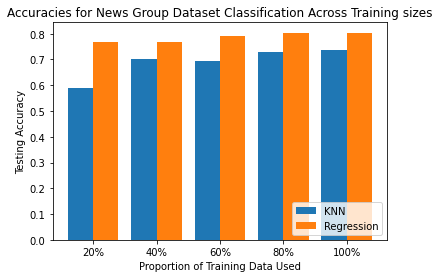


KNN Accuracies: 	['58.7%', '70.1%', '69.4%', '72.9%', '73.6%']
Regression Accuracies: 	['76.9%', '76.7%', '78.9%', '80.3%', '80.2%']


In [ ]:
# Plot Accuracies

X = ['20%', '40%', '60%', '80%', '100%']
X_axis = np.arange(len(X))
  
plt.bar(X_axis -.2 , KNN_accuracy, label = 'KNN', width=.4)
plt.bar(X_axis + .2, regression_accuracy, label = 'Regression', width=.4)
  
plt.xticks(X_axis, X)
plt.xlabel("Proportion of Training Data Used")
plt.title("Accuracies for News Group Dataset Classification Across Training sizes")
plt.ylabel("Testing Accuracy")
plt.legend(loc='lower right')
plt.show()

KNN_accuracy_str = [ str(x*100)[:4] + "%" for x in KNN_accuracy ]
regression_accuracy_str = [ str(x*100)[:4] + "%" for x in regression_accuracy ]

print(f"\nKNN Accuracies: \t{KNN_accuracy_str}")
print(f"Regression Accuracies: \t{regression_accuracy_str}")

In [137]:
vocab_size = 400
X_train, Y_train, X_val, Y_val, X_test, Y_test = create_data_set(vocab_size=vocab_size)

# Train Regression Model
D = X_train.shape[1]
C = Y_train.shape[1]
mlr = Multinomial_logistic(D, C)
mlr.fit(X_train, Y_train, X_val, Y_val, lr=0.003, niter=300, early_stopping=True, look_back=3)

Vocabulary has size 400

X_train: (2172, 400)
Y_train: (2172, 4)

X_validation: (790, 400)
Y_validation: (790, 4)

X_test: (790, 400)
Y_test: (790, 4)

iter 0: 1802.416; 732.785
iter 1: 1457.493; 633.801
iter 2: 1292.551; 590.191
iter 3: 1191.355; 562.485
iter 4: 1122.267; 539.386
iter 5: 1066.183; 525.937
iter 6: 1017.977; 511.436
iter 7: 981.996; 502.116
iter 8: 947.392; 492.083
iter 9: 920.150; 485.108
iter 10: 894.764; 477.709
iter 11: 874.106; 472.852
iter 12: 851.976; 466.962
iter 13: 833.822; 462.193
iter 14: 817.405; 458.268
iter 15: 802.162; 454.126
iter 16: 788.894; 451.329
iter 17: 774.264; 447.719
iter 18: 761.915; 444.728
iter 19: 750.428; 442.186
iter 20: 739.608; 439.495
iter 21: 729.785; 437.542
iter 22: 719.457; 435.085
iter 23: 710.327; 433.196
iter 24: 701.620; 431.146
iter 25: 693.575; 429.625
iter 26: 685.322; 427.729
iter 27: 677.877; 426.316
iter 28: 670.576; 424.664


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


iter 29: 663.833; 423.459
iter 30: 656.987; 421.951
iter 31: 650.719; 420.836
iter 32: 644.521; 419.500
iter 33: 638.744; 418.516
iter 34: 632.957; 417.299
iter 35: 627.570; 416.398
iter 36: 622.216; 415.302
iter 37: 617.186; 414.486
iter 38: 612.186; 413.489
iter 39: 607.467; 412.744
iter 40: 602.786; 411.837
iter 41: 598.344; 411.153
iter 42: 593.946; 410.327
iter 43: 589.752; 409.698
iter 44: 585.607; 408.943
iter 45: 581.636; 408.363
iter 46: 577.719; 407.673
iter 47: 573.950; 407.136
iter 48: 570.238; 406.504
iter 49: 566.653; 406.007
iter 50: 563.127; 405.428
iter 51: 559.711; 404.966
iter 52: 556.354; 404.435
iter 53: 553.092; 404.005
iter 54: 549.891; 403.519
iter 55: 546.771; 403.118
iter 56: 543.712; 402.672
iter 57: 540.725; 402.298
iter 58: 537.795; 401.890
iter 59: 534.931; 401.540
iter 60: 532.122; 401.166
iter 61: 529.371; 400.839
iter 62: 526.674; 400.496
iter 63: 524.030; 400.191
iter 64: 521.435; 399.877
iter 65: 518.890; 399.593
iter 66: 516.392; 399.304
iter 67: 513

(array([1802.41577608, 1457.49256485, 1292.55124177, 1191.35540645,
        1122.26718406, 1066.18259833, 1017.97655221,  981.99574509,
         947.391508  ,  920.14990197,  894.76406715,  874.10552468,
         851.97586389,  833.82190048,  817.40498326,  802.16159979,
         788.89388271,  774.2639643 ,  761.91515424,  750.42771488,
         739.60832374,  729.78470851,  719.45660625,  710.32699007,
         701.62022368,  693.57485415,  685.32165727,  677.87699285,
         670.57560179,  663.83327813,  656.98726961,  650.71884211,
         644.52053549,  638.74415314,  632.95677488,  627.56977774,
         622.21618136,  617.18635996,  612.18560601,  607.46652303,
         602.78584717,  598.34382815,  593.94613637,  589.75192316,
         585.60730296,  581.63620635,  577.71898179,  573.94995595,
         570.23802878,  566.65299817,  563.12721373,  559.71053589,
         556.35418388,  553.09221897,  549.89064145,  546.77140306,
         543.71168534,  540.724553  ,  537.79527

In [138]:
from scipy.special import mathieu_modcem1
cname=["graphics","baseball","medicine","christian"]

num_words = int(vocab_size/4)
vocab = list()
for i in range(4):
    top_words = list(np.argpartition(pmi[i], len(pmi[i]) - num_words)[-num_words:])
    for t in top_words:
        vocab.append(vectorize_X_dummy.get_feature_names_out()[t])
vocab.sort()

acr = pd.DataFrame(mlr.W)
acr.columns=cname
acr.index = vocab
print(acr)
p1=acr.sort_values(by=["baseball"] , ascending=False)
mm1=p1.head(5)
p2=acr.sort_values(by=["graphics"] , ascending=False)
mm2=p2.head(5)
p3=acr.sort_values(by=["christian"] , ascending=False)
mm3=p3.head(5)
p4=acr.sort_values(by=["medicine"] , ascending=False)
mm4=p4.head(5)
frames=[mm1,mm2,mm3,mm4]
result=pd.concat(frames)
ee=result.to_string(header=False)
wew=result.to_numpy()
print(wew)

          graphics  baseball  medicine  christian
absolute  0.175621  0.718126  0.481465   0.691212
accept   -0.089400  0.047920  0.989528   0.669852
access    0.883503  0.052071  0.638163   0.000792
acts      0.679020  0.568628  0.790735   1.243412
advance   0.952920  0.334891  0.034924   0.698199
...            ...       ...       ...        ...
yankees   0.461282  1.102782  0.303175  -0.140860
yeah      0.175606  0.626137  0.804059   0.534987
year     -0.195573  1.469923  0.468957   0.283792
york     -0.282635  0.926883  0.647328   0.595437
young    -0.376231  1.407194  0.656686   0.429434

[400 rows x 4 columns]
[[-3.31633013e-01  2.36434668e+00 -1.42528628e-01 -1.67478039e-01]
 [ 8.16223090e-02  2.11797207e+00 -2.57561568e-02  2.54241649e-01]
 [ 3.79667716e-01  2.01767664e+00  4.04294154e-02 -9.07252746e-02]
 [ 5.70792047e-01  1.87193967e+00  4.98584473e-02  4.62077531e-02]
 [-2.15424760e-01  1.85211269e+00 -3.51633248e-01  3.91131867e-01]
 [ 2.65369693e+00 -9.79255585e-02 -2.1874

<class 'pandas.core.frame.DataFrame'>


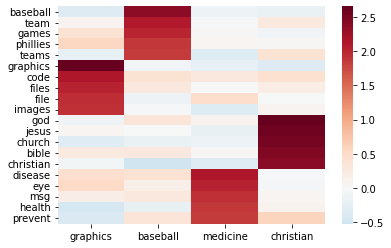

In [139]:
from seaborn import heatmap
W_hat = result
print(type(W_hat))
hmp = heatmap(W_hat, cmap='RdBu_r', center=0)
fig = hmp.get_figure()
fig.savefig("W_hat.png")

# Additional Experiment: lasso regression


In [ ]:
from sklearn import linear_model
cl1 = linear_model.Lasso(alpha=0.001)
cl2 = linear_model.Lasso(alpha=0.004)
cl3 = linear_model.Lasso(alpha=0.01)
cl4 = linear_model.Lasso(alpha=0.1)                        
                                                  
cl1=cl1.fit(X_train, Y_train)
cl2=cl2.fit(X_train, Y_train)
cl3=cl3.fit(X_train, Y_train)
cl4=cl4.fit(X_train, Y_train)
# cl1.score(X_train, Y_train)
# cl2.score(X_train, Y_train)
# cl3.score(X_train, Y_train)
# cl4.score(X_train, Y_train)
print("coefficient when lambda is 0.001")
print(cl1.coef_)
print("coefficient when lambda is 0.004")
print(cl2.coef_)
print("coefficient when lambda is 0.01")
print(cl3.coef_)
print("coefficient when lambda is 0.01")
print(cl4.coef_)

# print(cl1.intercept_)
# print(cl2.intercept_)
# print(cl3.intercept_)
# print(cl4.intercept_)

#show bias trade off larger lambda means larger pinalty on more viarance, so the sse of training is larger when we increase lamba
print("training sse when lambda is 0.001")
sw1 = np.square(cl1.predict(X_train) - Y_train).sum()
print(sw1)
print("training sse when lambda is 0.004")
sw2 = np.square(cl2.predict(X_train) - Y_train).sum()
print(sw2)
print("training sse when lambda is 0.01")
sw3 = np.square(cl3.predict(X_train) - Y_train).sum()
print(sw3)
print("training sse when lambda is 0.1")
sw4 = np.square(cl4.predict(X_train) - Y_train).sum()
print(sw4)

#here shows appropriately incresing lambda may increase accuracy
sse1 = np.square(cl1.predict(X_test) - Y_test).sum()
print("test sse when lambda is 0.001")
print(sse1)
print("test sse when lambda is 0.004")
sse2 = np.square(cl2.predict(X_test) - Y_test).sum()
print(sse2)
print("test sse when lambda is 0.01")
sse3 = np.square(cl3.predict(X_test) - Y_test).sum()
print(sse3)
print("test sse when lambda is 0.1")
sse4 = np.square(cl4.predict(X_test) - Y_test).sum()
print(sse4)

# sc1=cl1.score(X_test, Y_test)
# print(sc1)
# sc2=cl2.score(X_test, Y_test)
# print(sc2)
# sc3=cl3.score(X_test, Y_test)
# print(sc3)
# sc4=cl4.score(X_test, Y_test)
# print(sc4)
# #here we see the trend so we try again with smaller lambda,hoping to get better accuracy
# cl5 = linear_model.Lasso(alpha=0.000001)  
# cl5.fit(X_train, Y_train)
# sc5=cl5.score(X_test, Y_test)
# print(sc5)
# cl6 = linear_model.Lasso(alpha=0)  
# cl6.fit(X_train, Y_train)
# sc6=cl6.score(X_test, Y_test)
# print(sc6)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.185e-01, tolerance: 4.052e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


coefficient when lambda is 0.001
[[-0.         -0.00581003 -0.         ... -0.02447051 -0.
  -0.07066857]
 [-0.         -0.          0.         ...  0.06594052  0.
   0.03679115]
 [ 0.          0.00537951 -0.         ... -0.01167635  0.
  -0.        ]
 [-0.00096186  0.00400961  0.         ... -0.01912098 -0.
   0.00074836]]
coefficient when lambda is 0.004
[[-0.         -0.         -0.         ... -0.03349987 -0.
  -0.02169959]
 [-0.         -0.          0.         ...  0.07522456 -0.
   0.        ]
 [-0.         -0.         -0.         ... -0.010692   -0.
  -0.        ]
 [ 0.          0.          0.         ... -0.02489664 -0.
   0.        ]]
coefficient when lambda is 0.01
[[-0.         -0.         -0.         ... -0.03962515 -0.
  -0.        ]
 [-0.         -0.         -0.         ...  0.08538403  0.
   0.        ]
 [-0.         -0.         -0.         ... -0.01329994 -0.
  -0.        ]
 [ 0.          0.         -0.         ... -0.02159691 -0.
   0.        ]]
coefficient when lambda

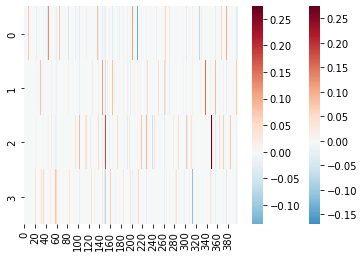

In [ ]:
hmp1 = heatmap(cl1.coef_, cmap='RdBu_r', center=0)
fig1 = hmp1.get_figure()


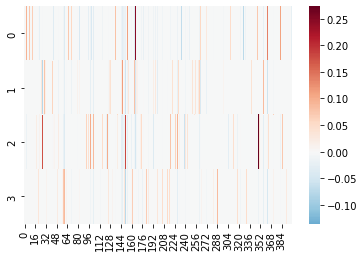

In [ ]:
hmp2 = heatmap(cl2.coef_, cmap='RdBu_r', center=0)
fig2 = hmp2.get_figure()

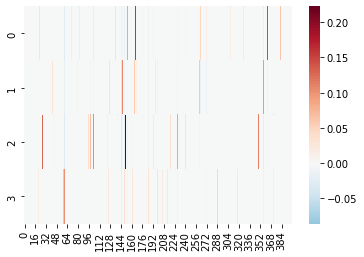

In [ ]:
hmp3 = heatmap(cl3.coef_, cmap='RdBu_r', center=0)
fig3 = hmp3.get_figure()

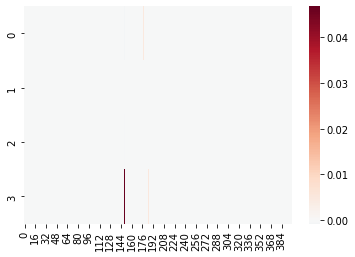

In [ ]:
hmp4 = heatmap(cl4.coef_, cmap='RdBu_r', center=0)
fig4 = hmp4.get_figure()

In [ ]:
#extra experiment ridge model
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
fitr_1=Ridge(0.1).fit(X_train,Y_train)
fitr_2=Ridge(0.3).fit(X_train,Y_train)
fitr_3=Ridge(0.5).fit(X_train,Y_train)
fitr_4=Ridge(0.7).fit(X_train,Y_train)
fitr_5= RidgeClassifier().fit(X_train,Y_train)
ridscore=[0]*5
ridscore[0]=fitr_1.score(X_train,Y_train)
ridscore[1]=fitr_2.score(X_train,Y_train)
ridscore[2]=fitr_3.score(X_train,Y_train)
ridscore[3]=fitr_4.score(X_train,Y_train)
ridscore[4]=fitr_5.score(X_train,Y_train)
print(ridscore)
rid =[0]*5
rid[0]=fitr_1.score(X_test,Y_test)
rid[1]=fitr_2.score(X_test,Y_test)
rid[2]=fitr_3.score(X_test,Y_test)
rid[3]=fitr_4.score(X_test,Y_test)
rid[4]=fitr_5.score(X_test,Y_test)
print(rid)

[0.5273699470809292, 0.5270008089334222, 0.5268672002607417, 0.5267722750875319, 0.58195211786372]
[-0.47702356195514645, -0.47289439172264086, -0.46698309568849083, -0.461005675565861, 0.3822784810126582]
